## Assignment 2

### Hengyi Ma(a1875198) Weiyou Liu(a1872800)

#### Task 1: Mining  frequent patterns(By Hengyi Ma)

##### Step 1: Read the data and have a brief check about the content :

In [1]:
import pandas as pd 
data=pd.read_csv("basket_data_by_date_train.csv")
print(data.describe())
print(data.head())

              BillNo      Quantity         Price    CustomerID          cost
count   40000.000000  40000.000000  40000.000000  40000.000000  40000.000000
mean   540254.879225      3.487700      3.732165  15577.606525     11.097411
std      2380.444952      2.611766      5.711630   1730.347123     13.298301
min    536365.000000      1.000000      0.100000  12347.000000      0.140000
25%    538093.000000      1.000000      1.650000  14224.000000      3.300000
50%    540373.000000      2.000000      2.950000  15570.000000      7.950000
75%    542360.000000      6.000000      4.650000  17220.000000     15.800000
max    544398.000000     10.000000    295.000000  18283.000000    527.700000
   BillNo                             Itemname  Quantity            Date  \
0  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  1/12/2010 8:26   
1  536365    GLASS STAR FROSTED T-LIGHT HOLDER         6  1/12/2010 8:26   
2  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  1/12/2010 8:26   
3  

Directly view the content of the data, this will help us know the part we should use during the following tasks.  
We can find some useful information, like we have itemname for the name of the commodity the customers bought, quantity and price could also be 
considered as important features which will directly influence the frequencey items and sales of the store.  
Each unique customerid means a unique customer(user) that we should consider during the designing the model.

In [32]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30
...,...,...,...,...,...,...,...
39995,544398,GREEN METAL SWINGING BUNNY,4,18/02/2011 12:27,0.85,15311,3.40
39996,544398,PINK 3 PIECE POLKADOT CUTLERY SET,2,18/02/2011 12:27,4.15,15311,8.30
39997,544398,GLITTER HANGING BUTTERFLY STRING,4,18/02/2011 12:27,2.10,15311,8.40
39998,544398,WHITE SPOT RED CERAMIC DRAWER KNOB,6,18/02/2011 12:27,1.25,15311,7.50


##### Step 2: Visual data analysis

Then we will use visualization techniques to see the data, this can give us a general understanding of the range and distribution of the data, which can be used as a reference for subsequent model design and analysis results.  
It is easy to think of sorting products directly according to quantity, which can directly obtain the information of the most frequently purchased products. We show the top ten products

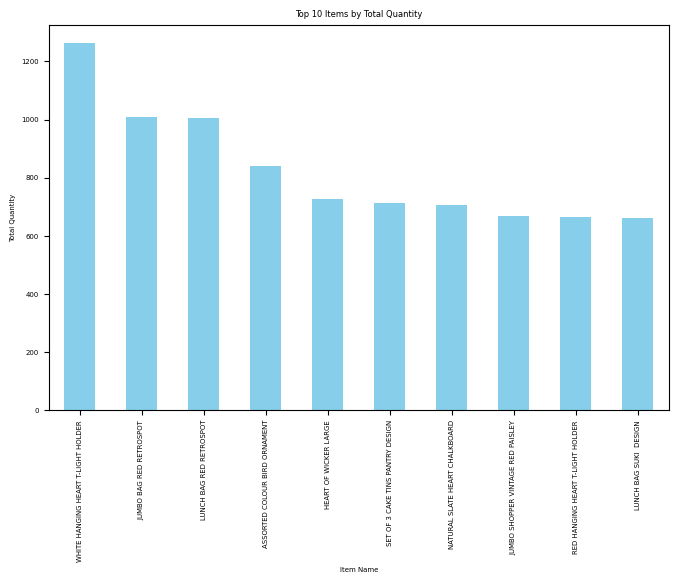

In [2]:
import matplotlib.pyplot as plt
total_quantity = data.groupby('Itemname')['Quantity'].sum()
top_items = total_quantity.sort_values(ascending=False).head(10)
plt.rcParams.update({'font.size': 5})
plt.figure(figsize=(8, 5))
top_items.plot(kind='bar', color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity')
plt.title('Top 10 Items by Total Quantity')
plt.xticks(rotation=90)
plt.show()

Sorting items based on purchase price is also a good idea to help stores determine the importance of items based on revenue. We show the top ten products

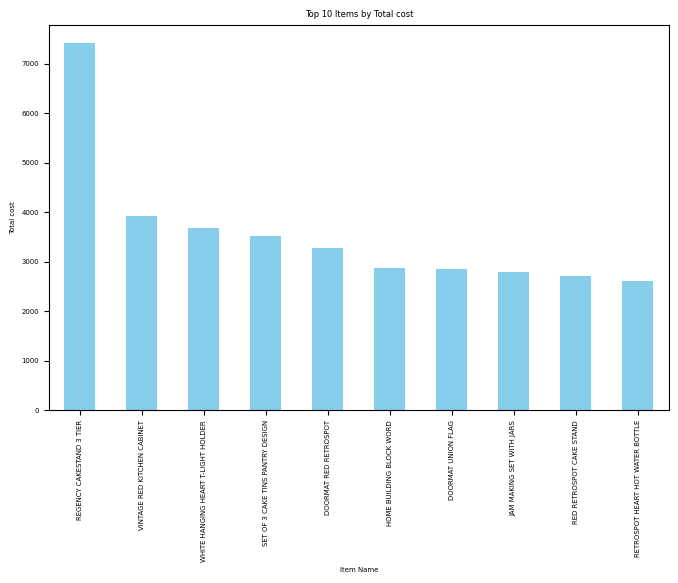

In [46]:
total_price = data.groupby('Itemname')['cost'].sum()
top_items = total_price.sort_values(ascending=False).head(10)
plt.rcParams.update({'font.size': 5})
plt.figure(figsize=(8, 5))
top_items.plot(kind='bar', color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Total cost')
plt.title('Top 10 Items by Total cost')
plt.xticks(rotation=90)
plt.show()

Viewing the total cost distribution of each customer can help determine how most people spend in the store and determine the store's consumer groups. It can be seen that most customers spend between 0-1000
 dollars.

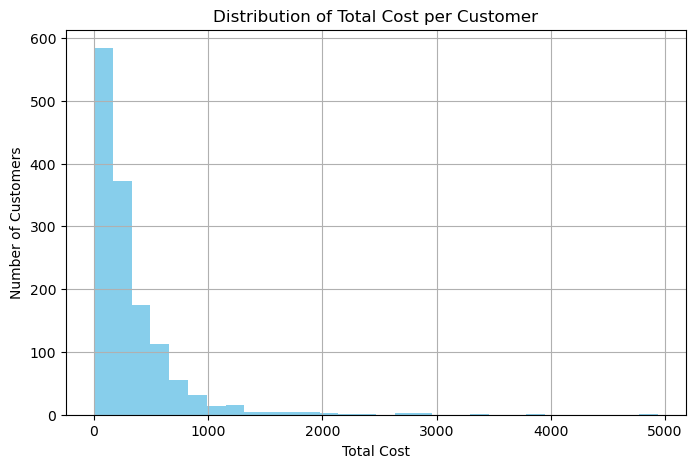

In [50]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 10})
total_cost = data.groupby('CustomerID')['cost'].sum()
total_cost.hist(bins=30, color='skyblue')
plt.xlabel('Total Cost')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Cost per Customer')
plt.show()

##### Step 3: Pre-process the data:

This part is used to preprocess data before model training, mainly including data inspection and processing of data structure.

First, we check whether there are missing values in the training set. If there are, we will delete the row directly. However, the check results show that there are no missing values in the data and can be used directly.

In [52]:
missing_values=data.isnull().sum().sum()
missing_values

0

In order to facilitate subsequent data processing, we reconstruct the data based on product name and customer ID. Since we need to explore the correlation between items and build rules, we pay more attention to whether the item appears rather than the quantity of the item. Therefore, the data of the same customer ID is merged and the product name list is expanded. The values ​​in it are only written as true or false according to the purchase situation.

In [3]:
from mlxtend.preprocessing import TransactionEncoder
data1=data.copy()
transactions = data1.groupby('BillNo')['Itemname'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Step 3: Generate frequent itemsets&association rules: 

We'll use some code from workshop 5[1] and to generate frequent itemsets and construct the rules, but we'll use FP-Growth Algorithm instead of the apriori Algorithm, since from the experiment we find that FP-Growth is much faster and is good for large datasets, there are also some other advantages like Scalability and Flexibility, we get some of them from Anıl Çoğalan[2].

In addition, we also selected different min_support thresholds for experiments and used the results to find a relatively suitable threshold. Based on the experimental results, we chose threshold=0.01, because it can be seen that this is the inflection point of the entire data, and a trade-off between the number of rules, lift and threshold is reached here.

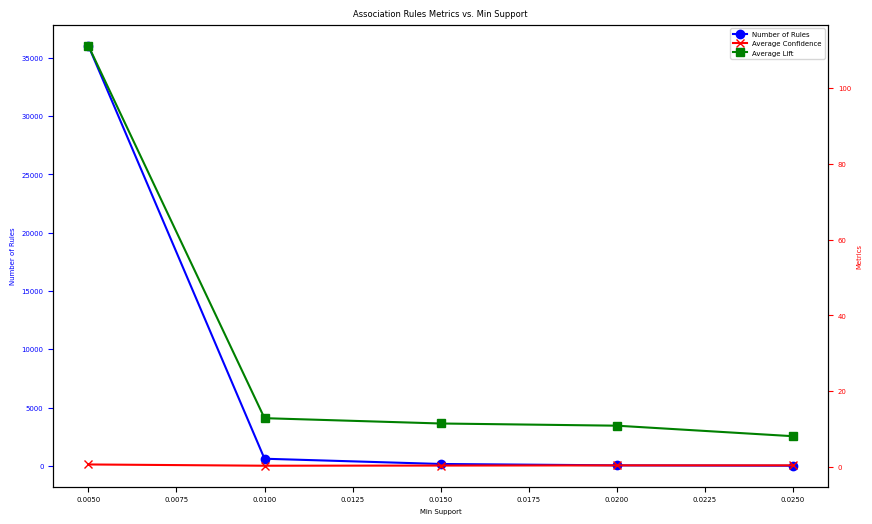

In [4]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
num_rules_list = []
min_support_list = []
confidence_list = []
lift_list = []

for i in range(5):
    min_support = 0.005 * (i + 1)  
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
    num_rules = len(rules)
    num_rules_list.append(num_rules)
    min_support_list.append(min_support)
    avg_confidence = rules['confidence'].mean()
    avg_lift = rules['lift'].mean()
    confidence_list.append(avg_confidence)
    lift_list.append(avg_lift)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(min_support_list, num_rules_list, marker='o', color='b', label='Number of Rules')
ax1.set_xlabel('Min Support')
ax1.set_ylabel('Number of Rules', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(min_support_list, confidence_list, marker='x', color='r', label='Average Confidence')
ax2.plot(min_support_list, lift_list, marker='s', color='g', label='Average Lift')
ax2.set_ylabel('Metrics', color='r')
ax2.tick_params('y', colors='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.title('Association Rules Metrics vs. Min Support')
plt.ticklabel_format(style='plain')
plt.show()

##### Step 4: Display the frequent itemsets and association rules:

Here we print some frequent itemsets generated using FP-growth and their support. In the process of generating rules, the threshold is set to 0.7, so that the generated rules are all high-confidence rules, and further adjustments to the relevant rules can be omitted when building the recommendation system later.

In [5]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
if len(frequent_itemsets) == 0:
    print("frequent_itemsets is empty!")
else:
    print("Frequent Itemsets:")
    print(frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0    0.105388               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.039223              (KNITTED UNION FLAG HOT WATER BOTTLE)
2    0.035658                   (RED WOOLLY HOTTIE WHITE HEART.)
3    0.031300                     (SET 7 BABUSHKA NESTING BOXES)
4    0.029319                   (CREAM CUPID HEARTS COAT HANGER)
..        ...                                                ...
693  0.011886  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 3 C...
694  0.017433  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 6 H...
695  0.015055  (SET OF 6 HERB TINS SKETCHBOOK, SET OF 3 CAKE ...
696  0.012282  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 6 H...
697  0.013471  (SET OF 3 CAKE TINS SKETCHBOOK, SET OF 3 CAKE ...

[698 rows x 2 columns]


Then we generate the association rules according to the frequent itemsets we get before.

In [6]:
print("\nAssociation Rules:")
print(rules)
rules_df = pd.DataFrame(rules)
rules_df.to_csv('rules.csv', index=False)


Association Rules:
                                          antecedents  \
0                         (POPPY'S PLAYHOUSE KITCHEN)   
1                         (POPPY'S PLAYHOUSE BEDROOM)   
2   (WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA...   
3   (WOODEN FRAME ANTIQUE WHITE, WOOD 2 DRAWER CAB...   
4   (WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PIC...   
..                                                ...   
58               (BAKING MOULD HEART WHITE CHOCOLATE)   
59                (SET OF 6 SPICE TINS PANTRY DESIGN)   
60  (JAM MAKING SET WITH JARS, SET OF 6 SPICE TINS...   
61  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 6 H...   
62  (SET OF 3 CAKE TINS PANTRY DESIGN, SET OF 6 HE...   

                             consequents  antecedent support  \
0            (POPPY'S PLAYHOUSE BEDROOM)            0.029319   
1            (POPPY'S PLAYHOUSE KITCHEN)            0.026149   
2           (WOODEN FRAME ANTIQUE WHITE)            0.015848   
3    (WOODEN PICTURE FRAME WHITE FINISH

Using the same process, we construct the frequent itemsets and association rules of the test set and display them.

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
datat=pd.read_csv("basket_data_by_date_test.csv")
data2=datat.copy()
transactions = data2.groupby('BillNo')['Itemname'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = fpgrowth(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
if len(frequent_itemsets) == 0:
    print("frequent_itemsets is empty!")
else:
    print("Frequent Itemsets:")
    print(frequent_itemsets)
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

Frequent Itemsets:
      support                                           itemsets
0    0.051071                (JUMBO SHOPPER VINTAGE RED PAISLEY)
1    0.042834                         (LOVE BUILDING BLOCK WORD)
2    0.019769                        (EDWARDIAN PARASOL NATURAL)
3    0.014827                      (RED HEART SHAPE LOVE BUCKET)
4    0.014827                    (WOODEN HAPPY BIRTHDAY GARLAND)
..        ...                                                ...
969  0.014827   (STRAWBERRY CHARLOTTE BAG, JUMBO BAG STRAWBERRY)
970  0.011532  (LUNCH BAG SPACEBOY DESIGN, STRAWBERRY CHARLOT...
971  0.011532  (JUMBO BAG SCANDINAVIAN BLUE PAISLEY, JUMBO BA...
972  0.011532  (HANGING CHICK GREEN DECORATION, HANGING CHICK...
973  0.011532  (FELTCRAFT GIRL AMELIE KIT, FELTCRAFT GIRL NIC...

[974 rows x 2 columns]


In [49]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
                                           antecedents  \
0          (DOORMAT NEW ENGLAND, DOORMAT ENGLISH ROSE)   
1    (DOORMAT ENGLISH ROSE, DOORMAT SPOTTY HOME SWE...   
2                      (BLUE GIANT GARDEN THERMOMETER)   
3    (PARTY BUNTING, SET OF 6 SPICE TINS PANTRY DES...   
4            (JAM MAKING SET WITH JARS, PARTY BUNTING)   
..                                                 ...   
283              (JUMBO BAG SCANDINAVIAN BLUE PAISLEY)   
284                   (HANGING CHICK GREEN DECORATION)   
285                 (HANGING CHICK  YELLOW DECORATION)   
286                        (FELTCRAFT GIRL NICOLE KIT)   
287                        (FELTCRAFT GIRL AMELIE KIT)   

                            consequents  antecedent support  \
0      (DOORMAT SPOTTY HOME SWEET HOME)            0.016474   
1                 (DOORMAT NEW ENGLAND)            0.011532   
2      (IVORY GIANT GARDEN THERMOMETER)            0.014827   
3    (SET OF 3 CAKE TINS PANTRY

The analysis of the results from frequent itemset mining and rule generation reveals some common patterns.  
 Firstly, many items remain consistent between the frequent itemsets mined using FP-growth and the product catalog sorted by quantity using visualization analysis, such as WHITE HANGING HEART T-LIGHT HOLDER, which are the most numerous even though FP-growth ignores quantity and only counts occurrence frequency. This indicates that high-frequency products mined using different analysis methods are in high demand and have good robustness, and should be emphasized in subsequent purchasing strategies.  
 Secondly, the rules for constructing the training set and the test set can all find a pattern, that is, products with higher correlation are either relatively close or matching products, which can give us a preliminary understanding of the design of the recommendation system.

#### Task 2: Recommender systems(By Weiyou Liu)

##### Step 5:Construct model function

In this part, we refer to the recommendation system construction rules of workshop5 and design the recommendation process of our recommendation system. We first construct a user-item matrix based on the input data set, then use cosine similarity to calculate the similarity scores between items to obtain a similarity matrix, and design a recommendation score calculation system based on past purchase records and current items. We also added logic to generate recommendations based on the pattern generated by task1. For the cold start problem of new users, we use a simple but effective logic, which is to select the most popular items for recommendation.

In [7]:
import ast
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
class RecommendationSystem:
    def __init__(self, train_data, test_data, use_pattern=False):
        self.train_data = train_data.astype({'CustomerID': 'int'})
        self.test_data = test_data.astype({'CustomerID': 'int'})
        self.patterns = use_pattern
        self.user_items_matrix_train = self.users_items_matrix(self.train_data)
        self.user_items_matrix_test = self.users_items_matrix(self.test_data)
        self.item_similarity = {}
        self.neighbors=3
    #Construct user-item matrix
    def users_items_matrix(self, dataframe):     
        user_item_matrix = dataframe.groupby(['CustomerID', 'Itemname']).size().reset_index(name='Quantity')
        user_item_matrix = user_item_matrix.pivot_table(index='CustomerID', 
                                                                columns='Itemname', 
                                                                values='Quantity', fill_value=0)
        return user_item_matrix
    #Constructing a user-item matrix that introduces patterns
    def use_patterns(self, df_patterns):
        users = self.user_items_matrix_train.index
        for user in users:
            ser_aim = self.user_items_matrix_train.loc[user, :]
            user_cart = ser_aim[ser_aim != 0].index  
            user_cart = set(user_cart)

            for index, row in df_patterns.iterrows():
                if row['set1'].issubset(user_cart):
                    imputed_items = list(row['set2'])
                    self.user_items_matrix_train.loc[user, imputed_items] = 1
    #Compute cosine similarity
    def cos_similarity(self):
        columns = self.user_items_matrix_train.columns
        for i in range(len(columns)): 
            item_i = np.array(self.user_items_matrix_train[columns[i]],dtype=float).reshape(1,-1)
            list_sim = []
            
            for j in range(len(columns)):
                if i==j:
                    continue
                else:
                    item_j = np.array(self.user_items_matrix_train[columns[j]],dtype=float).reshape(1,-1)
                    similarity = round(cosine_similarity(item_i, item_j)[0][0],3)
                    list_sim.append((columns[j], similarity))
            list_sim = sorted(list_sim, key=lambda x: x[1], reverse=True)
            self.item_similarity[columns[i]] = list_sim
    #Construct a score calculation method,The number of neighbors referenced when calculating the similarity 
    #score is variable. By default, we use 3 neighbors to calculate the similarity score.
    def calculate_scores(self, user_cart_train, target_item):
        if len(user_cart_train) <= self.neighbors:
            neighbors = len(user_cart_train)
        else:
            neighbors = self.neighbors  
        target_similarity = self.item_similarity[target_item]
        sim_in_cart = []
        for i in target_similarity:
            for j in user_cart_train:
                if i[0]==j[0]:
                    sim_in_cart.append(i)
        sim_in_cart = sorted(sim_in_cart, key=lambda x: x[0])
        user_cart_train = sorted(user_cart_train, key=lambda x: x[0])
        for sim, num, index in zip(sim_in_cart, user_cart_train, range(len(user_cart_train))):
            modified_similarity = sim[1] * num[1]
            sim_in_cart[index] = (sim[0], modified_similarity)
        sim_in_cart = sorted(sim_in_cart, key=lambda x: x[1])[:neighbors]
        scores = sum([each[1] for each in sim_in_cart])*100
        return (target_item, scores)
    #Build a recommendation system, we choose to generate 10 recommendations for each input
    def recommend(self, user_cart):
        N=10
        if not isinstance(user_cart, list):
            user_cart = [(user_cart, 1)]  
        if len(user_cart) == 0:
            most_popular_items = list(self.user_items_matrix_train.sum().sort_values(ascending=False)[:N].index)
            return most_popular_items
        if len(user_cart) == 1:
            sim_to_cart = self.item_similarity[user_cart[0][0]]
            recommend = [each[0] for each in sim_to_cart[:N]]
            return recommend
        score_list = []
        selected_items = [each[0] for each in user_cart]
        all_items = list(self.item_similarity.keys())
        non_selected_items = [each for each in all_items if each not in selected_items]
        for ns_item in non_selected_items:
            score_list.append(self.calculate_scores(user_cart, ns_item))
        score_items = sorted(score_list, key=lambda x: x[1], reverse=True)
        recommend = [each[0] for each in score_items[:N]]
        return recommend
    #Design the train function
    def train(self):
        if self.patterns==False:
            self.cos_similarity()
        elif self.patterns==True:
            df_patterns = pd.read_csv("rules.csv")
            df_patterns['set1'] = df_patterns['antecedents'].apply(lambda x: ast.literal_eval(x.split('frozenset(')[1].split(')')[0]))
            df_patterns['set2'] = df_patterns['consequents'].apply(lambda x: ast.literal_eval(x.split('frozenset(')[1].split(')')[0]))
            df_patterns = df_patterns.loc[:,['set1','set2','confidence']]
            self.use_patterns(df_patterns)
            self.cos_similarity()
    #Design the evaluate function, for none-cold start and cold start we use different methods.
    def evaluate(self):
        train_users = set(self.user_items_matrix_train.index)
        test_users = set(self.user_items_matrix_test.index)
        new_users = [user for user in test_users if user not in train_users]
        exist_users = [user for user in test_users if user in train_users]
        precision_at_k = []
        recall_at_k = []
        f1_at_k = []

        for user in exist_users:
            user_cart_train = self.user_items_matrix_train.loc[user,:] 
            user_cart_train = user_cart_train[user_cart_train!=0]
            user_cart_train = list(user_cart_train.items())
            user_cart_test = self.user_items_matrix_test.loc[user,:]
            user_cart_test = user_cart_test[user_cart_test!=0]
            user_cart_test = list(user_cart_test.index)
            recommendation = self.recommend(user_cart_train)
            like_items = [item for item in recommendation if item in user_cart_test]
            precision = len(like_items)/len(recommendation)
            recall = len(like_items)/len(user_cart_test)
            if precision + recall==0:
                f1=0
            else:
                f1 = 2*(precision*recall)/(precision+recall)
            precision_at_k.append(precision)
            recall_at_k.append(recall)
            f1_at_k.append(f1)
        for user in new_users:
            user_cart_test = self.user_items_matrix_test.loc[user,:]
            user_cart_test = user_cart_test[user_cart_test!=0]
            user_cart_test = list(user_cart_test.index)
            recommendation = self.recommend([])
            like_items = [item for item in recommendation if item in user_cart_test]
            precision = len(like_items)/len(recommendation)
            recall = len(like_items)/len(user_cart_test)
            if precision + recall==0:
                f1=0
            else:
                f1 = 2*(precision*recall)/(precision+recall)
            precision_at_k.append(precision)
            recall_at_k.append(recall)
            f1_at_k.append(f1)
        precision_output = round(np.mean(precision_at_k),3)
        recall_output = round(np.mean(recall_at_k),3)
        f1_output = round(np.mean(f1_at_k),3)
        return precision_output, recall_output, f1_output

##### Step 6: Results evaluation:

Here we use two different methods to train the model, one is a model without the pattern generated by task1 participating in the training, and the other is introducing the pattern generated by task1 to participate in the training.

We use Precision, recall and F1-score as evaluation metrics.  
Precision rate refers to the proportion of items recommended to users that are actually liked by users. The higher the accuracy, the higher the proportion of items recommended by the system that truly meet the user's preferences.  
Recall rate refers to the proportion of items that users actually like that are successfully recommended by the system. The higher the recall rate, the more comprehensive the system can cover the items that users like.  
The F1 value is the harmonic average of precision and recall, which takes into account the accuracy and comprehensiveness of the recommendation results. The closer the value is to 1, the better the recommendation effect of the system.  
The results show that the effect of using patterns or not in model training is not very obvious, but in general the model using patterns performs better.

In [75]:
data_train = pd.read_csv("basket_data_by_date_train.csv")
data_test = pd.read_csv("basket_data_by_date_test.csv")
print(data_test.isnull().sum().sum())
data_test = data_test.dropna()
print(data_test.isnull().sum().sum())
rs = RecommendationSystem(data_train, data_test, use_pattern=False)
rs.train()
avg_precision, avg_recall, avg_f1 = rs.evaluate()
print(f"Average Precision: {avg_precision}, Average Recall: {avg_recall}, Average F1-score: {avg_f1}")

Average Precision: 0.051, Average Recall: 0.037, Average F1-score: 0.035


In [76]:
rs1 = RecommendationSystem(data_train, data_test, use_pattern=True)
rs1.train()
avg_precision, avg_recall, avg_f1 = rs1.evaluate()
print(f"Average Precision: {avg_precision}, Average Recall: {avg_recall}, Average F1-score: {avg_f1}")

Average Precision: 0.051, Average Recall: 0.038, Average F1-score: 0.036


We select the top five patterns of training set for recommendation and reference. The items corresponding to patterns are:  
WHITE HANGING HEART T-LIGHT HOLDER   
KNITTED UNION FLAG HOT WATER BOTTLE  
RED WOOLLY HOTTIE WHITE HEART   
SET 7 BABUSHKA NESTING BOXES      
CREAM CUPID HEARTS COAT HANGER  
Then we find two CustomerIDs with these items for each rule in the test set and make recommendations


In [9]:
customer_ids = data_test.loc[data_test['Itemname'].str.contains("WHITE HANGING HEART T-LIGHT HOLDER"), 'CustomerID'].unique()
print(customer_ids[:2])
customer_ids = data_test.loc[data_test['Itemname'].str.contains("KNITTED UNION FLAG HOT WATER BOTTLE"), 'CustomerID'].unique()
print(customer_ids[:2])
customer_ids = data_test.loc[data_test['Itemname'].str.contains("RED WOOLLY HOTTIE WHITE HEART"), 'CustomerID'].unique()
print(customer_ids[:2])
customer_ids = data_test.loc[data_test['Itemname'].str.contains("SET 7 BABUSHKA NESTING BOXES"), 'CustomerID'].unique()
print(customer_ids[:2])
customer_ids = data_test.loc[data_test['Itemname'].str.contains("CREAM CUPID HEARTS COAT HANGER"), 'CustomerID'].unique()
print(customer_ids[:2])

[17338. 16014.]
[17338. 13077.]
[12709. 17817.]
[12509. 15241.]
[17338. 16907.]


In [10]:
#Recommendation for pattern 1(user with item from rule 1)
user_data = data_test[data_test['CustomerID'] == 17338]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)
print("-----------------")
user_data = data_test[data_test['CustomerID'] == 16014]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)

72 SWEETHEART FAIRY CAKE CASES
HEART OF WICKER SMALL
REX CASH+CARRY JUMBO SHOPPER
10 COLOUR SPACEBOY PEN
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
-----------------
HEART OF WICKER SMALL
NATURAL SLATE HEART CHALKBOARD
RETROSPOT RED WASHING UP GLOVES
RECIPE BOX RETROSPOT
REX CASH+CARRY JUMBO SHOPPER
CLOTHES PEGS RETROSPOT PACK 24
HEART OF WICKER LARGE
JUMBO BAG RED RETROSPOT
SMALL POPCORN HOLDER
HAND WARMER BABUSHKA DESIGN


In [11]:
#Recommendation for pattern 2(user with item from rule 2)
user_data = data_test[data_test['CustomerID'] == 17338]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)
print("-----------------")
user_data = data_test[data_test['CustomerID'] == 13077]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)

72 SWEETHEART FAIRY CAKE CASES
HEART OF WICKER SMALL
REX CASH+CARRY JUMBO SHOPPER
10 COLOUR SPACEBOY PEN
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
-----------------
10 COLOUR SPACEBOY PEN
12 COLOURED PARTY BALLOONS
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
12 PENCILS SMALL TUBE SKULL
12 PENCILS TALL TUBE POSY


In [12]:
#Recommendation for pattern 3(user with item from rule 3)
user_data = data_test[data_test['CustomerID'] == 12709]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)
print("-----------------")
user_data = data_test[data_test['CustomerID'] == 17817]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)

HAND WARMER RED POLKA DOT
RETRO COFFEE MUGS ASSORTED
VINTAGE BILLBOARD DRINK ME MUG
KNITTED UNION FLAG HOT WATER BOTTLE
VINTAGE BILLBOARD LOVE/HATE MUG
GLASS STAR FROSTED T-LIGHT HOLDER
IVORY EMBROIDERED QUILT
SAVE THE PLANET MUG
WHITE METAL LANTERN
HAND WARMER UNION JACK
-----------------
FELTCRAFT CUSHION RABBIT
72 SWEETHEART FAIRY CAKE CASES
IVORY KITCHEN SCALES
ENAMEL WASH BOWL CREAM
LOVE BUILDING BLOCK WORD
HEART OF WICKER LARGE
HOME BUILDING BLOCK WORD
SET OF 3 CAKE TINS PANTRY DESIGN
HEART OF WICKER SMALL
RETROSPOT TEA SET CERAMIC 11 PC


In [13]:
#Recommendation for pattern 4(user with item from rule 4)
user_data = data_test[data_test['CustomerID'] == 12509]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)
print("-----------------")
user_data = data_test[data_test['CustomerID'] == 15241]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)

JUMBO BAG OWLS
SMALL FOLKART STAR CHRISTMAS DEC
JUMBO BAG RED RETROSPOT
HEART OF WICKER LARGE
PAPER BUNTING WHITE LACE
LUNCH BAG SPACEBOY DESIGN
WICKER STAR
SMALL PURPLE BABUSHKA NOTEBOOK
JUMBO BAG CHARLIE AND LOLA TOYS
WOOD BLACK BOARD ANT WHITE FINISH
-----------------
HOT WATER BOTTLE BABUSHKA
POPPY'S PLAYHOUSE KITCHEN
PINK CREAM FELT CRAFT TRINKET BOX
FELTCRAFT DOLL MARIA
FELTCRAFT CUSHION OWL
FELTCRAFT CHRISTMAS FAIRY
FELTCRAFT CUSHION BUTTERFLY
GREY FLORAL FELTCRAFT SHOULDER BAG
FELTCRAFT CUSHION RABBIT
PINK BLUE FELT CRAFT TRINKET BOX


In [14]:
#Recommendation for pattern 5(user with item from rule 5)
user_data = data_test[data_test['CustomerID'] == 17338]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)
print("-----------------")
user_data = data_test[data_test['CustomerID'] == 16907]
user_cart = list(user_data['Itemname'].apply(lambda x: (x, 1)).values)
recommendations = rs1.recommend(user_cart)
for item in recommendations:
    print(item)

72 SWEETHEART FAIRY CAKE CASES
HEART OF WICKER SMALL
REX CASH+CARRY JUMBO SHOPPER
10 COLOUR SPACEBOY PEN
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
-----------------
DOORMAT RED RETROSPOT
HEART OF WICKER LARGE
RECIPE BOX PANTRY YELLOW DESIGN
REGENCY CAKESTAND 3 TIER
SET OF 3 CAKE TINS PANTRY DESIGN
REX CASH+CARRY JUMBO SHOPPER
HEART OF WICKER SMALL
PARTY BUNTING
PINK HEART SHAPE EGG FRYING PAN
HOME BUILDING BLOCK WORD


Trend study on the impact of the number of neighbors on the model

We also study how the performance of the model computed with different numbers of neighbors changes in the performance of the model by varying the parameter number of neighbors. We use five parameters of 1, 3, 5, 7, and 9 to train the model, and the performance is shown in the figure below. It can be seen that using more neighbors to participate in similarity calculation within a certain range is beneficial to improving the performance of the recommendation system.

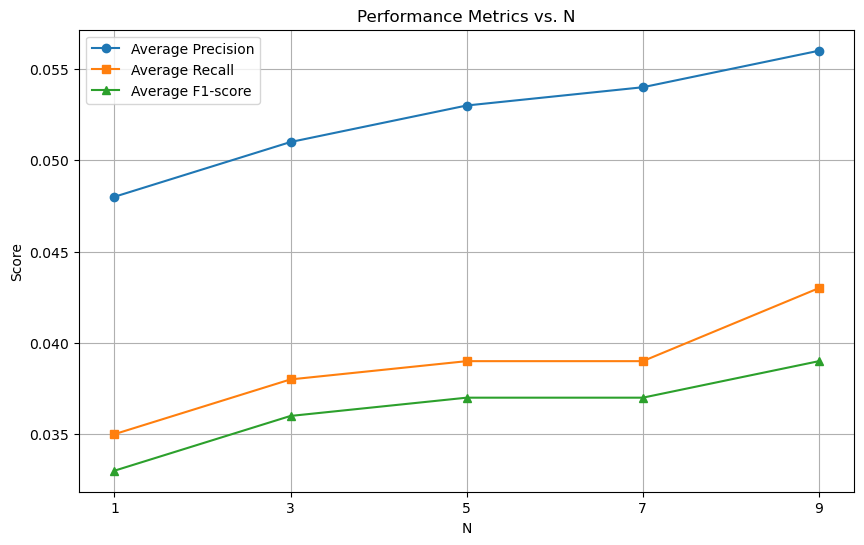

In [3]:
import matplotlib.pyplot as plt
N = [1, 3, 5, 7, 9]
avg_precision = [0.048, 0.051, 0.053, 0.054, 0.056]
avg_recall = [0.035, 0.038, 0.039, 0.039, 0.043]
avg_f1_score = [0.033, 0.036, 0.037, 0.037, 0.039]
plt.figure(figsize=(10, 6))
plt.plot(N, avg_precision, marker='o', label='Average Precision')
plt.plot(N, avg_recall, marker='s', label='Average Recall')
plt.plot(N, avg_f1_score, marker='^', label='Average F1-score')
plt.xlabel('N')
plt.ylabel('Score')
plt.title('Performance Metrics vs. N')
plt.xticks(N)
plt.legend()
plt.grid(True)
plt.show()

## References

1.Workshop 5: Frequent Itemset Mining and Recommender Systems

2.https://medium.com/@anilcogalan/fp-growth-algorithm-how-to-analyze-user-behavior-and-outrank-your-competitors-c39af08879db